In [1]:
#1. Import thư viện cần thiết
import pickle
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn import metrics
import sklearn.preprocessing
import datetime
import os
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score

In [2]:
#2. Đọc dữ liệu từ file
df = pd.read_csv('/content/SAMSUNG.csv')

In [3]:
#3. Làm sạch dữ liệu
df['Open'] = df['Open'].replace(0, df['Open'].mean())
df['High'] = df['High'].replace(0, df['High'].mean())
df['Low'] = df['Low'].replace(0, df['Low'].mean())
df['Close'] = df['Close'].replace(0, df['Close'].mean())
df

,Date,Close,Open,High,Low
0,2019-03-01,64592.45648,64636.91167,65094.842037,64135.009671
1,2019-03-02,64592.45648,64636.91167,65094.842037,64135.009671
2,2019-03-03,64592.45648,64636.91167,65094.842037,64135.009671
3,2019-03-04,44850.00000,46000.00000,46100.000000,44800.000000
4,2019-03-05,44250.00000,44600.00000,45100.000000,44150.000000
...,...,...,...,...,...
1915,2024-05-28,77600.00000,76500.00000,78000.000000,76200.000000
1916,2024-05-29,75200.00000,77700.00000,78200.000000,75200.000000
1917,2024-05-30,73500.00000,74800.00000,75200.000000,73500.000000
1918,2024-05-31,73500.00000,74500.00000,74700.000000,73500.000000


In [4]:
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor

# Chọn features và target
X = df[['Open', 'High', 'Low']]
y = df['Close']

train_size = int(0.7 * len(df))
test_size = int(0.3 * len(df))

X_train = X[:train_size]
X_test = X[train_size:]
y_train = y[:train_size]
y_test = y[train_size:]

# Khởi tạo mô hình
model = XGBRegressor()

# Huấn luyện mô hình
model.fit(X_train, y_train)

# Dự đoán kết quả trên tập train và tập test
train_predict = model.predict(X_train)
predictions_xgb = model.predict(X_test)

In [5]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Tính Mean Absolute Error
mae = mean_absolute_error(y_test, predictions_xgb)
print(f"Mean Absolute Error (MAE): {mae}")

# Tính Mean Squared Error
mse = mean_squared_error(y_test, predictions_xgb)
print(f"Mean Squared Error (MSE): {mse}")

# Tính R-squared
r2 = r2_score(y_test, predictions_xgb)
print(f"R-squared (R2): {r2}")

# Tính Root Mean Squared Error
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Tính Mean Absolute Percentage Error
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(y_test, predictions_xgb)
print(f"Mean Absolute Percentage Error (MAPE): {mape}%")

Mean Absolute Error (MAE): 292.2228164394113
Mean Squared Error (MSE): 200648.87652046324
R-squared (R2): 0.9940522404266189
Root Mean Squared Error (RMSE): 447.9384740346192
Mean Absolute Percentage Error (MAPE): 0.42474392299604347%


**Dự đoán 30 ngày tiếp theo**

In [6]:
import numpy as np

# Chuyển y_test thành NumPy array trước khi gọi reshape
x_input = X_test.iloc[60].to_numpy().reshape(1, -1)
x_input.shape

temp_input = list(x_input)
temp_input = temp_input[0].tolist()

from numpy import array

lst_output = []
n_steps = 100
i = 0
while(i < 30):

    if(len(temp_input) > 3):
        # Chỉ lấy 3 phần tử cuối cùng
        x_input = np.array(temp_input[-3:])
        print("{} day input {}".format(i, x_input))
        x_input = x_input.reshape((1, -1))
        # Dự đoán
        yhat = model.predict(x_input)
        print("{} day output {}".format(i, yhat))
        temp_input.extend(yhat.tolist())
        temp_input = temp_input[1:]
        lst_output.extend(yhat.tolist())
        i = i + 1
    else:
        x_input = x_input.reshape((1, -1))
        yhat = model.predict(x_input)
        print(yhat[0])
        temp_input.extend(yhat.tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i = i + 1

54986.11
4
1 day input [56000.       54500.       54986.109375]
1 day output [54416.438]
2 day input [54500.       54986.109375 54416.4375  ]
2 day output [54817.742]
3 day input [54986.109375  54416.4375    54817.7421875]
3 day output [54543.99]
4 day input [54416.4375     54817.7421875  54543.98828125]
4 day output [54958.58]
5 day input [54817.7421875  54543.98828125 54958.578125  ]
5 day output [54543.99]
6 day input [54543.98828125 54958.578125   54543.98828125]
6 day output [54958.58]
7 day input [54958.578125   54543.98828125 54958.578125  ]
7 day output [54543.99]
8 day input [54543.98828125 54958.578125   54543.98828125]
8 day output [54958.58]
9 day input [54958.578125   54543.98828125 54958.578125  ]
9 day output [54543.99]
10 day input [54543.98828125 54958.578125   54543.98828125]
10 day output [54958.58]
11 day input [54958.578125   54543.98828125 54958.578125  ]
11 day output [54543.99]
12 day input [54543.98828125 54958.578125   54543.98828125]
12 day output [54958.58]


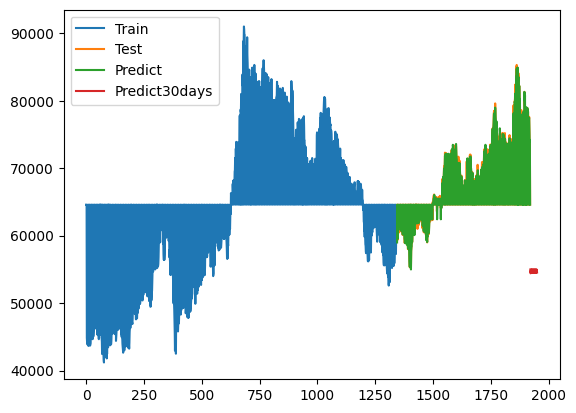

In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
# Plotting
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(train_data_index, y_train)

test_data_index = pd.RangeIndex(start=train_size, stop=train_size + len(y_test), step=1)
plt.plot(test_data_index, y_test)

# Adjusting y_pred to have correct shape and length
test_data_index_pred = pd.RangeIndex(start=train_size, stop=train_size + len(predictions_xgb), step=1)
plt.plot(test_data_index_pred, predictions_xgb)

# Adjusting lst_output to have correct shape and length
prediect_data_index = pd.RangeIndex(start=len(df), stop=len(df) + len(lst_output), step=1)
plt.plot(prediect_data_index, lst_output)

plt.legend(['Train', 'Test', 'Predict', 'Predict30days'])
plt.show()

**Dự đoán 60 ngày tiếp theo**

In [8]:
import numpy as np

# Chuyển y_test thành NumPy array trước khi gọi reshape
x_input = X_test.iloc[60].to_numpy().reshape(1, -1)
x_input.shape

temp_input = list(x_input)
temp_input = temp_input[0].tolist()

from numpy import array

lst_output_60 = []
n_steps = 100
i = 0
while(i < 60):

    if(len(temp_input) > 3):
        # Chỉ lấy 3 phần tử cuối cùng
        x_input = np.array(temp_input[:3])
        print("{} day input {}".format(i, x_input))
        x_input = x_input.reshape((1, -1))
        # Dự đoán
        yhat = model.predict(x_input)
        print("{} day output {}".format(i, yhat))
        temp_input.extend(yhat.tolist())
        temp_input = temp_input[1:]
        lst_output_60.extend(yhat.tolist())
        i = i + 1
    else:
        x_input = x_input.reshape((1, -1))
        yhat = model.predict(x_input)
        print(yhat[0])
        temp_input.extend(yhat.tolist())
        print(len(temp_input))
        lst_output_60.extend(yhat.tolist())
        i = i + 1

54986.11
4
1 day input [55500. 56000. 54500.]
1 day output [54986.11]
2 day input [56000.       54500.       54986.109375]
2 day output [54416.438]
3 day input [54500.       54986.109375 54986.109375]
3 day output [55029.754]
4 day input [54986.109375 54986.109375 54416.4375  ]
4 day output [54764.15]
5 day input [54986.109375   54416.4375     55029.75390625]
5 day output [54543.99]
6 day input [54416.4375     55029.75390625 54764.1484375 ]
6 day output [55039.547]
7 day input [55029.75390625 54764.1484375  54543.98828125]
7 day output [54600.926]
8 day input [54764.1484375  54543.98828125 55039.546875  ]
8 day output [54543.99]
9 day input [54543.98828125 55039.546875   54600.92578125]
9 day output [55039.547]
10 day input [55039.546875   54600.92578125 54543.98828125]
10 day output [54472.812]
11 day input [54600.92578125 54543.98828125 55039.546875  ]
11 day output [54606.406]
12 day input [54543.98828125 55039.546875   54472.8125    ]
12 day output [54827.535]
13 day input [55039.5

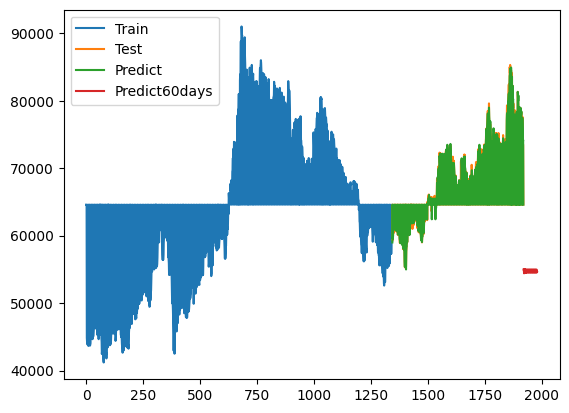

In [9]:
# Plotting
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(train_data_index, y_train)

test_data_index = pd.RangeIndex(start=train_size, stop=train_size + len(y_test), step=1)
plt.plot(test_data_index, y_test)

# Adjusting y_pred to have correct shape and length
test_data_index_pred = pd.RangeIndex(start=train_size, stop=train_size + len(predictions_xgb), step=1)
plt.plot(test_data_index_pred, predictions_xgb)

# Adjusting lst_output_60 to have correct shape and length
prediect_data_index = pd.RangeIndex(start=len(df), stop=len(df) + len(lst_output_60), step=1)
plt.plot(prediect_data_index, lst_output_60)

plt.legend(['Train', 'Test', 'Predict', 'Predict60days'])
plt.show()

**Dự đoán 90 ngày tiếp theo**

In [10]:
import numpy as np

# Chuyển y_test thành NumPy array trước khi gọi reshape
x_input = X_test.iloc[60].to_numpy().reshape(1, -1)
x_input.shape

temp_input = list(x_input)
temp_input = temp_input[0].tolist()

from numpy import array

lst_output_90 = []
n_steps = 100
i = 0
while(i < 90):

    if(len(temp_input) > 3):
        # Chỉ lấy 3 phần tử cuối cùng
        x_input = np.array(temp_input[-3:])
        print("{} day input {}".format(i, x_input))
        x_input = x_input.reshape((1, -1))
        # Dự đoán
        yhat = model.predict(x_input)
        print("{} day output {}".format(i, yhat))
        temp_input.extend(yhat.tolist())
        temp_input = temp_input[1:]
        lst_output_90.extend(yhat.tolist())
        i = i + 1
    else:
        x_input = x_input.reshape((1, -1))
        yhat = model.predict(x_input)
        print(yhat[0])
        temp_input.extend(yhat.tolist())
        print(len(temp_input))
        lst_output_90.extend(yhat.tolist())
        i = i + 1

54986.11
4
1 day input [56000.       54500.       54986.109375]
1 day output [54416.438]
2 day input [54500.       54986.109375 54416.4375  ]
2 day output [54817.742]
3 day input [54986.109375  54416.4375    54817.7421875]
3 day output [54543.99]
4 day input [54416.4375     54817.7421875  54543.98828125]
4 day output [54958.58]
5 day input [54817.7421875  54543.98828125 54958.578125  ]
5 day output [54543.99]
6 day input [54543.98828125 54958.578125   54543.98828125]
6 day output [54958.58]
7 day input [54958.578125   54543.98828125 54958.578125  ]
7 day output [54543.99]
8 day input [54543.98828125 54958.578125   54543.98828125]
8 day output [54958.58]
9 day input [54958.578125   54543.98828125 54958.578125  ]
9 day output [54543.99]
10 day input [54543.98828125 54958.578125   54543.98828125]
10 day output [54958.58]
11 day input [54958.578125   54543.98828125 54958.578125  ]
11 day output [54543.99]
12 day input [54543.98828125 54958.578125   54543.98828125]
12 day output [54958.58]


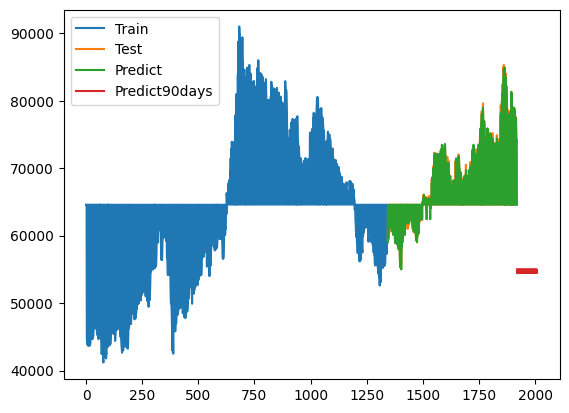

In [11]:
# Plotting
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(train_data_index, y_train)

test_data_index = pd.RangeIndex(start=train_size, stop=train_size + len(y_test), step=1)
plt.plot(test_data_index, y_test)

# Adjusting y_pred to have correct shape and length
test_data_index_pred = pd.RangeIndex(start=train_size, stop=train_size + len(predictions_xgb), step=1)
plt.plot(test_data_index_pred, predictions_xgb)

# Adjusting lst_output_60 to have correct shape and length
prediect_data_index = pd.RangeIndex(start=len(df), stop=len(df) + len(lst_output_90), step=1)
plt.plot(prediect_data_index, lst_output_90)

plt.legend(['Train', 'Test', 'Predict', 'Predict90days'])
plt.show()